# TD 3 - Mise en pratique des séances 1 et 2 - Utilisation de pandas et visualisation - correction

Correction de l'exercice 2 et manipulations classiques de texte.

In [ ]:
%matplotlib inline

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
from pyensae.datasource import download_data
files = download_data("td2a_eco_exercices_de_manipulation_de_donnees.zip",
                      url="https://github.com/sdpython/ensae_teaching_cs/raw/master/_doc/notebooks/td2a_eco/data/")
files

['Players_WC2014.xlsx', 'velib_t1.txt', 'velib_t2.txt', 'villes.txt']

## Exercice 2 - Les villes

Durée : 40 minutes

1. Importer la base des villes villes.xls
2. Les noms de variables et les observations contiennent des espaces inutiles (exemple : 'MAJ   ') : commnecer par nettoyer l'ensemble des chaines de caractères (à la fois dans les noms de colonnes et dans les observations)
3. Trouver le nombre de codes INSEE différents (attention aux doublons)
4. Comment calculer rapidement la moyenne, le nombre et le maximum pour chaque variable numérique ? (une ligne de code)
5. Compter le nombre de villes dans chaque Region et en faire un dictionnaire où la clé est la région et la valeur le nombre de villes
6. Représenter les communes en utilisant  

    * matplotlib   
    * une librairie de cartographie (ex : folium)  

In [ ]:
import pandas
df_villes = pandas.read_csv("villes.txt", sep="\t", encoding="utf-8")
print(df_villes.columns)

Index([' Nom Ville ', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')


In [ ]:
df_villes.head()

,Nom Ville,MAJ,Code Postal,Code INSEE,Code Région,Latitude,Longitude,Eloignement
0,L'Abergement-Clémenciat,L ABERGEMENT CLEMENCIAT,1400,1001,82,46.150000,4.916667,1.46
1,L'Abergement-de-Varey,L ABERGEMENT DE VAREY,1640,1002,82,46.000000,5.416667,1
2,Amareins,AMAREINS,1090,1003,82,46.083333,4.8,1.85
3,Ambérieu-en-Bugey,AMBERIEU EN BUGEY,1500,1004,82,45.950000,5.35,0.8
4,Ambérieux-en-Dombes,AMBERIEUX EN DOMBES,1330,1005,82,46.000000,4.9,1.72


## Nettoyage des noms

In [ ]:
# Corriger les espaces en trop
# solution pour les espaces
# les colonnes
df_villes.rename(columns=lambda x: x.strip(),inplace = True)
# les observations
df_villes['Nom Ville'] = df_villes[['Nom Ville']].applymap(lambda x: x.strip())
df_villes['MAJ'] = df_villes[['MAJ']].applymap(lambda x: x.strip())

In [ ]:
df_villes.columns

Index(['Nom Ville', 'MAJ', 'Code Postal', 'Code INSEE', 'Code Région',
       'Latitude', 'Longitude', 'Eloignement'],
      dtype='object')

## Nombre de codes commune

In [ ]:
len(df_villes['Code INSEE'].unique())

35248

## Stats desc

In [ ]:
df_villes.describe()

,Code Postal,Code INSEE,Code Région,Latitude
count,35249.000000,35249.000000,35249.000000,35249.000000
mean,46291.014554,46186.992822,48.532497,46.998450
std,25418.598824,25411.240496,27.264257,2.206877
min,1000.000000,1001.000000,0.000000,41.391667
25%,24640.000000,24550.000000,24.000000,45.216667
50%,49150.000000,49074.000000,43.000000,47.450000
75%,66720.000000,66203.000000,72.000000,48.850000
max,95880.000000,95690.000000,94.000000,51.083333


## Régions et nombre de communes

In [ ]:
df_villes.groupby(['Code Région']).size().to_dict()

{0: 86,
 11: 4181,
 21: 1462,
 22: 1433,
 23: 1342,
 24: 1766,
 25: 1774,
 26: 1483,
 31: 1494,
 41: 1825,
 43: 1104,
 52: 1188,
 53: 1243,
 54: 830,
 72: 5450,
 73: 1535,
 74: 837,
 82: 2368,
 83: 977,
 91: 1871,
 93: 662,
 94: 338}

## Représenter visuellement les communes

In [ ]:
import pandas
df_villes.Longitude = pandas.to_numeric(df_villes.Longitude)

### matplotlib

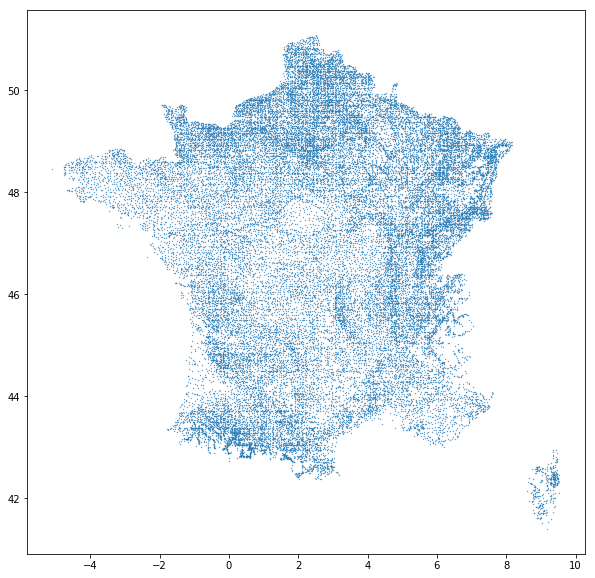

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(df_villes.Longitude, df_villes.Latitude, s=0.1)

### Exemple avec Folium

In [ ]:
import folium
import random

locations = df_villes[['Latitude', 'Longitude']].copy()
print(locations.shape, locations.dropna().shape)
locations.dropna(inplace = True)

locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

(35249, 2) (35183, 2)


[45.933333000000005, 5.3333330000000005]

In [ ]:
communes_random = random.sample(locationlist, 50)

In [ ]:
map = folium.Map(location=[47.088615, 2.637424], zoom_start=6)
for point in range(0,len(communes_random)) :
    folium.Marker(communes_random[point]).add_to(map)
map